In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GroundTruth-FalsaImagen-Reescalada.zip to GroundTruth-FalsaImagen-Reescalada (2).zip


In [ ]:
!pwd

/content


In [ ]:
#Se extraen las imágenes tomadas del dataset
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['GroundTruth-FalsaImagen-Reescalada.zip']), 'r')
data.extractall()

# Imágenes Positivas

In [ ]:
#Se definen las dimensiones de las imágenes positivas (Poseen las armas)
#Se crea un arreglo con las imágenes positivas redimensionadas
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
pandas_folder_path="/content/GroundTruth-FalsaImagen-Reescalada/GroundTruth-Reescalada"
armas=[]
img_size=150
for img in os.listdir(pandas_folder_path):
    img = cv2.imread(os.path.join(pandas_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    armas.append(img_resize)

In [ ]:
#Se convierte la lista armas en un array
#Se muestra el tamaño del array
armas = np.array(armas)
print(len(armas))

153


# Imágenes negativas

In [ ]:
#Se definen las dimensiones de las imágenes negativas (No poseen las armas)
#Se crea un arreglo con las imágenes negativas redimensionadas
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
pandas_folder_path="/content/GroundTruth-FalsaImagen-Reescalada/FalsaImagen-Reescalada"
no_armas=[]
img_size=150
for img in os.listdir(pandas_folder_path):
    img = cv2.imread(os.path.join(pandas_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    no_armas.append(img_resize)

In [ ]:
#Se convierte la lista no_armas en un array
#Se muestra el tamaño del array
no_armas = np.array(no_armas)
print(len(no_armas))

69


(150, 150, 3)


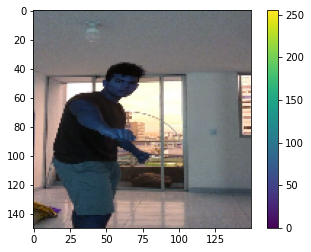

In [ ]:
#Seleccionamos una imagen para mostrar cómo se está tratando
#Utilizamos squeeze para representarla gráficamnete y para pasar de 4 dimensiones a 3
print(no_armas[4].shape)
plt.figure()
plt.imshow(np.squeeze(no_armas[6]))
plt.colorbar()
plt.grid(False)
plt.show()

# Concatenar las imágenes

In [ ]:
# Cantidad de imágenes en total 
# Se muestra las dimensiones del nuevo array
images= np.concatenate([armas,no_armas])
print(len(images))
Images = np.array(images)
print(Images.shape)

222
(222, 150, 150, 3)


# Etiquetar imágenes

In [ ]:
# Se etiquetan las imágenes verdaderas con 0 y las falsas con 1
# Se imprimen la cantidad de labels
etiquetas_armas= np.repeat(0,len(armas))
etiquetas_no_armas= np.repeat(1,len(no_armas))

class_names=['Arma','No arma']
labels = np.concatenate([etiquetas_armas,etiquetas_no_armas])
print(labels)
Labels= np.array(labels)
print(Labels.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(222,)



# Primeras 20 figuras

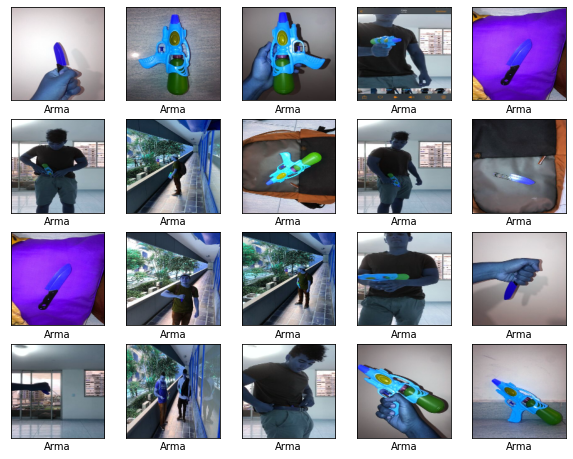

In [ ]:
# Graficar las primeras 20 figuras
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i])
    #, cmap=plt.cm.binary
    plt.xlabel(class_names[Labels[i]])
plt.show()

In [ ]:
# Inicialización de las librerías de tensorflow
from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.8.2


# Modelo utilizado

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
trained=model.fit(Images, Labels, epochs=30)

Epoch 1/30
7/7 [==============================] - 1s 59ms/step - loss: 9485.2549 - accuracy: 0.5901
Epoch 2/30
7/7 [==============================] - 0s 61ms/step - loss: 1305.6163 - accuracy: 0.4910
Epoch 3/30
7/7 [==============================] - 0s 57ms/step - loss: 695.6968 - accuracy: 0.5721
Epoch 4/30
7/7 [==============================] - 0s 59ms/step - loss: 278.9678 - accuracy: 0.6757
Epoch 5/30
7/7 [==============================] - 0s 61ms/step - loss: 137.1172 - accuracy: 0.7252
Epoch 6/30
7/7 [==============================] - 0s 59ms/step - loss: 181.5185 - accuracy: 0.7072
Epoch 7/30
7/7 [==============================] - 0s 58ms/step - loss: 59.7693 - accuracy: 0.8153
Epoch 8/30
7/7 [==============================] - 0s 57ms/step - loss: 37.0343 - accuracy: 0.8514
Epoch 9/30
7/7 [==============================] - 0s 59ms/step - loss: 39.5915 - accuracy: 0.8333
Epoch 10/30
7/7 [==============================] - 0s 57ms/step - loss: 47.3366 - accuracy: 0.8468
Epoch 11/30

# Imagen de prueba

In [ ]:
# Tomamos una imagen de prueba, se imprimen sus dimensiones
numero_imagen=105
img=Images[numero_imagen]
print(img.shape)
img=(np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


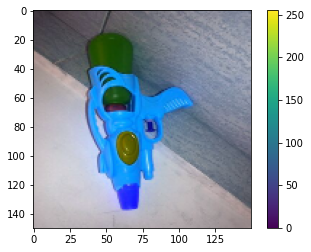

In [ ]:
plt.figure()
plt.imshow(Images[numero_imagen])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Se le da el nombre del objeto de una sola predicción
predictions_single = model.predict(img)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])
bandera=False
if(class_names[np.argmax(predictions_single)]=="Arma"):
  bandera=True

IPython.display.Audio("/content/y2mate.com - Alarma Antirrobo  Efecto de Sonido HD.mp3",autoplay=bandera)

[[1. 0.]]
1.0
0
Arma


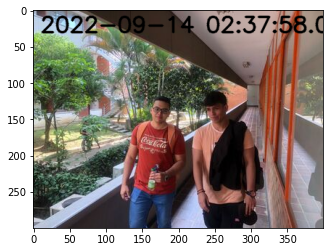

In [ ]:
# Se repite el proceso para otra imagen
from datetime import datetime
import IPython.display 
img=cv2.imread("/content/WhatsApp Image 2022-09-13 at 1.07.53 PM.jpeg")
img_cvt=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_cvt,str(datetime.now()),(10,30), font, 1,(0,0,0),2,cv2.LINE_AA)
plt.imshow(img_cvt)
plt.show()

In [ ]:
img2=img_cvt
img2=cv2.resize(img2,(img_size,img_size))
print(img2.shape)
img2=(np.expand_dims(img2,0))
print(img2.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
predictions_single = model.predict(img2)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])


#Se realizó el apartado de la alarma de esta forma debido a que no se reproducia el audio si se ponía dentro de un 
#condicional
bandera=False
if(class_names[np.argmax(predictions_single)]=="Arma"):
  bandera=True

IPython.display.Audio("/content/y2mate.com - Alarma Antirrobo  Efecto de Sonido HD.mp3",autoplay=bandera)

[[0. 1.]]
1.0
1
No arma
